<a href="https://colab.research.google.com/github/ersjunior/3DTS-DataProcessingWithPython/blob/main/3DTS_Processamento_de_dados_com_Python_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotécas necessárias

In [26]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Iniciando a aula 7

* Acessando a base de dados

In [12]:
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')

dados.head()

,SEXO,ALTURA,PESO
0,0,187.571423,109.951620
1,0,174.706036,73.777488
2,0,188.239668,96.700389
3,0,182.196685,100.019305
4,0,177.499762,93.795364


* Criando variáveis de treino e teste

In [46]:
x_treino, x_teste, y_treino, y_teste = train_test_split(dados[['ALTURA', 'PESO']], dados['SEXO'], test_size=0.20)

* Mostrando a base de treino x como um df

In [14]:
x_treino.head(2)

,ALTURA,PESO
7773,170.971461,69.959223
6804,156.529489,53.983148


* Prevendo logisticamente os sexos por peso

<Axes: xlabel='PESO', ylabel='SEXO'>

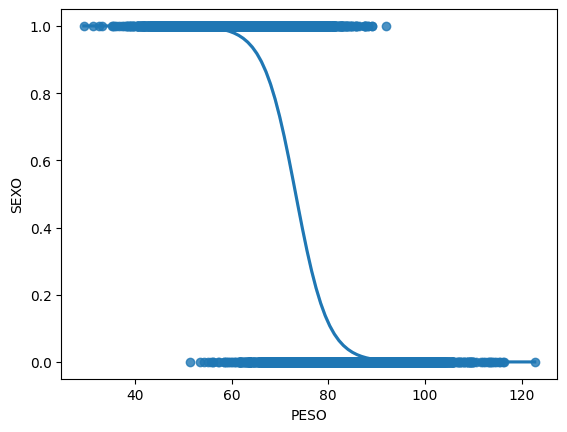

In [15]:
sns.regplot(x='PESO', y='SEXO', data=dados, logistic=True)

* Prevendo logisticamente os sexos por altura

<Axes: xlabel='ALTURA', ylabel='SEXO'>

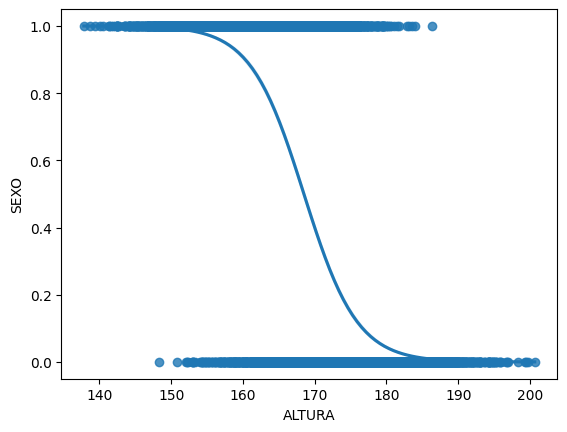

In [16]:
sns.regplot(x='ALTURA', y='SEXO', data=dados, logistic=True)

* Medindo a acuracia da base de treino usando regressão linear

In [24]:
reglog = LogisticRegression()
reglog.fit(x_treino, y_treino)
acc_treino = reglog.score(x_treino, y_treino)
acc_treino*100

92.0

* prevendo a acuracia da base de teste usando predict

In [32]:
prev_teste = reglog.predict(x_teste)
acc_teste = accuracy_score(y_teste, prev_teste)
acc_teste * 100

91.4

* Analisando diferença e precisão com lib confusion_matrix

[[910  81]
 [ 91 918]]


<Axes: >

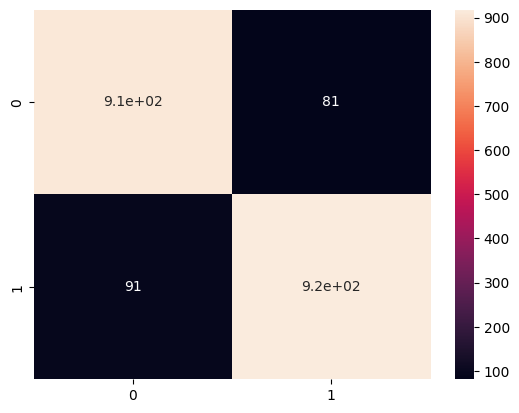

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

* Fazendo os calculos de comparação com a lib classification_report

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, prev_teste))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       991
           1       0.92      0.91      0.91      1009

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



# Exercício 1 Aula 8

In [35]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20prever2.csv')
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20okk.csv')

print(teste.head(2))
print(treino.head(2))

   Inadimplente  Genero  GrauEscolaridade  Profissao  Renda
0             1       1                 4          1    1.4
1             0       2                 7          9    2.6
   Inadimplente  Genero  GrauEscolaridade  Profissao  Renda
0             1       1                 4          1    1.4
1             0       2                 7          9    2.6


* Fazendo previsões com a base de treino

In [71]:
# Criando uma variável com a equação de regressão linear
reglog = LogisticRegression()

# Aplicando a regressão as notas das provas 1 e 2 para prever a nota 3
reglog.fit(treino[['Genero', 'GrauEscolaridade', 'Profissao','Renda']], treino['Inadimplente'])
print(reglog.coef_, reglog.intercept_)

[[ 0.0456239   0.00247481 -1.57006215 -0.57194875]] [10.1616868]


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


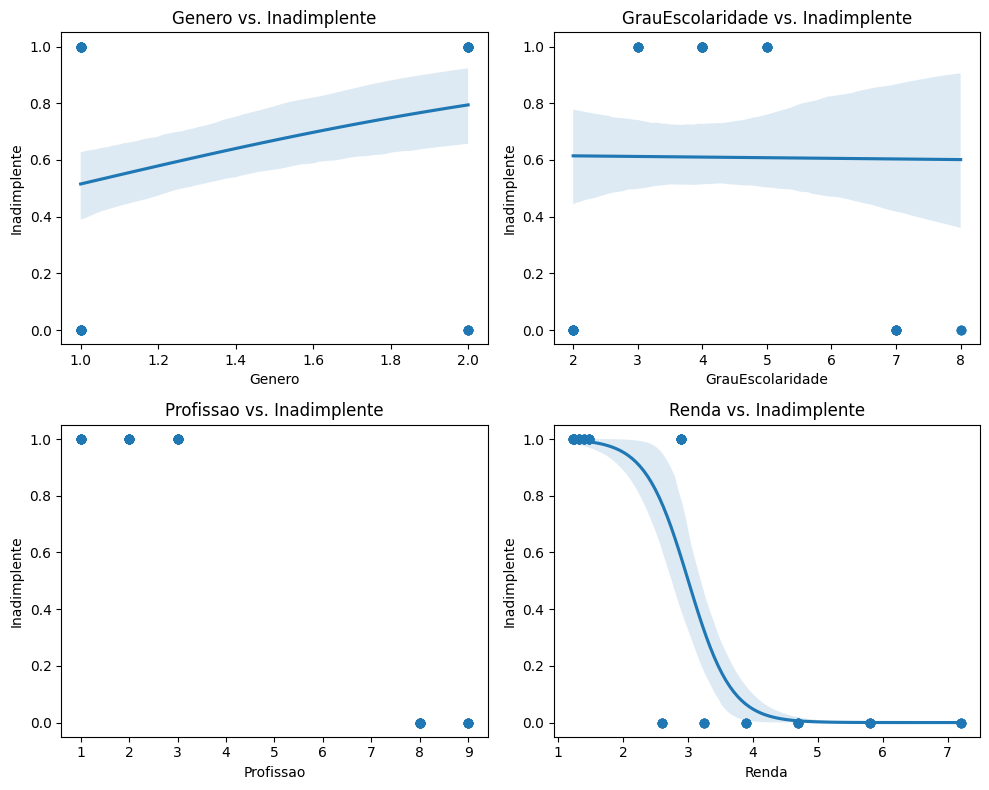

In [80]:
# Prevendo inadimplentes por genero, grau de escolaridade, profissão e renda
# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Gráfico 1
sns.regplot(
    data=treino, x='Genero', y='Inadimplente', logistic=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Genero vs. Inadimplente')

# Gráfico 2
sns.regplot(
    data=treino, x='GrauEscolaridade', y='Inadimplente', logistic=True,
    ax=axes[0, 1]
)
axes[0, 1].set_title('GrauEscolaridade vs. Inadimplente')

# Gráfico 3
sns.regplot(
    data=treino, x='Profissao', y='Inadimplente', logistic=True,
    ax=axes[1, 0])
axes[1, 0].set_title('Profissao vs. Inadimplente')

# Gráfico 4
sns.regplot(
    data=treino, x='Renda', y='Inadimplente', logistic=True,
    ax=axes[1, 1])
axes[1, 1].set_title('Renda vs. Inadimplente')

# Ajustar o layout dos subgráficos
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [75]:
reglog = LogisticRegression()
reglog.fit(treino[['Genero', 'GrauEscolaridade', 'Profissao','Renda']], treino['Inadimplente'])
acc_treino = reglog.score(treino[['Genero', 'GrauEscolaridade', 'Profissao','Renda']], treino['Inadimplente'])
acc_treino*100

100.0

* Fazendo previsões com a base de teste

In [77]:
# Criando uma variável com a equação de regressão linear
reglog = LogisticRegression()

# Aplicando a regressão as notas das provas 1 e 2 para prever a nota 3
reglog.fit(teste[['Genero', 'GrauEscolaridade', 'Profissao','Renda']], teste['Inadimplente'])
print(reglog.coef_, reglog.intercept_)

[[ 0.05356626 -0.36256944 -0.70617756 -0.30830587]] [6.20534403]


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


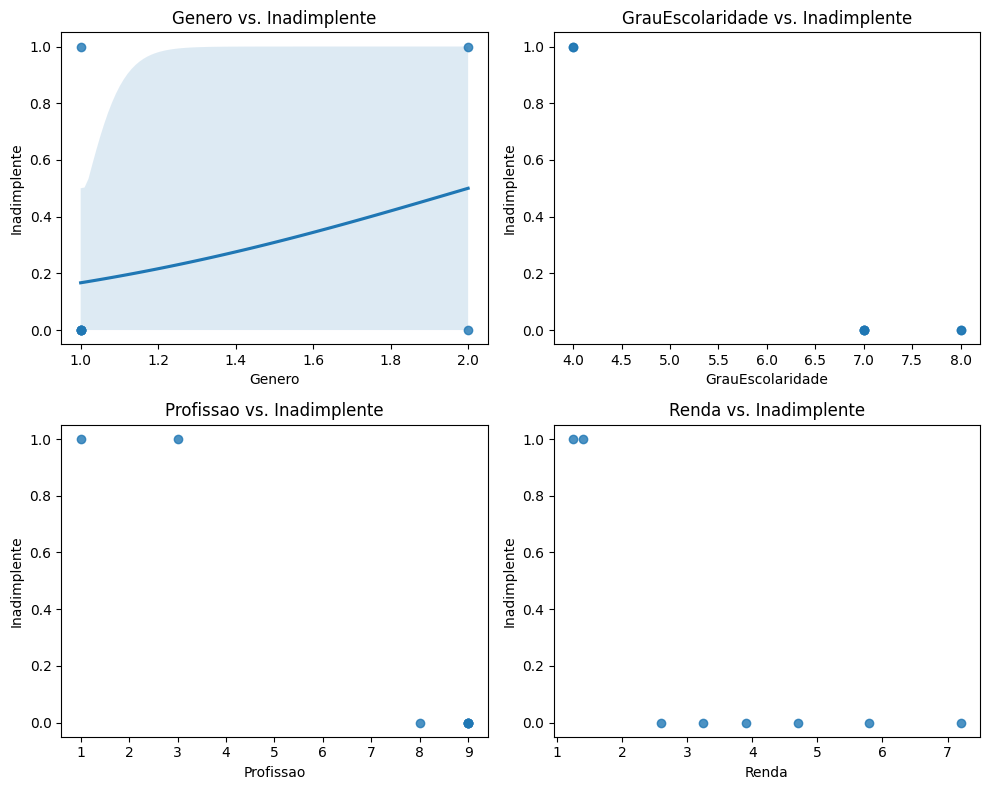

In [81]:
# Prevendo inadimplentes por genero, grau de escolaridade, profissão e renda
# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Gráfico 1
sns.regplot(
    data=teste, x='Genero', y='Inadimplente', logistic=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Genero vs. Inadimplente')

# Gráfico 2
sns.regplot(
    data=teste, x='GrauEscolaridade', y='Inadimplente', logistic=True,
    ax=axes[0, 1]
)
axes[0, 1].set_title('GrauEscolaridade vs. Inadimplente')

# Gráfico 3
sns.regplot(
    data=teste, x='Profissao', y='Inadimplente', logistic=True,
    ax=axes[1, 0])
axes[1, 0].set_title('Profissao vs. Inadimplente')

# Gráfico 4
sns.regplot(
    data=teste, x='Renda', y='Inadimplente', logistic=True,
    ax=axes[1, 1])
axes[1, 1].set_title('Renda vs. Inadimplente')

# Ajustar o layout dos subgráficos
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [82]:
reglog = LogisticRegression()
reglog.fit(teste[['Genero', 'GrauEscolaridade', 'Profissao','Renda']], teste['Inadimplente'])
acc_treino = reglog.score(teste[['Genero', 'GrauEscolaridade', 'Profissao','Renda']], teste['Inadimplente'])
acc_treino*100

100.0

# Exercício Final

## Regressão Logistica: Exercício

* Monte um algoritmo preditivo de classificação, utilizando Regressão Logística.

* Para tal, selecione uma base de dados adequada no https://www.kaggle.com/datasets.

* Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label. Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto)